In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")
from pandas.core.dtypes.common import is_numeric_dtype
import seaborn as sns

In [152]:
df = pd.read_csv("insurance.csv")

In [153]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [155]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [156]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()
df10 = df.copy()
df11 = df.copy()
df12 = df.copy()

Handle the Null value

In [157]:
#ekhne kono null value nai kono column a. jodi thake tahole
#je column a null value thakto sei column niye kaj krtm

In [158]:
Mean__Charges = df.bmi.mean()
Mean__Charges

30.66339686098655

In [159]:
df.bmi = df.bmi.fillna(Mean__Charges)

In [160]:
df.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [161]:
df.iloc[45] #nirdisto kono row er details

age                  55
gender             male
bmi                37.3
children              0
smoker               no
region        southwest
charges     20630.28351
Name: 45, dtype: object

Encode using the replace method.

In [162]:
gender = df.gender.unique()
gender

array(['female', 'male'], dtype=object)

In [163]:
df.gender = df.gender.replace(['female','male'],[1,2])
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,2,33.770,1,no,southeast,1725.55230
2,28,2,33.000,3,no,southeast,4449.46200
3,33,2,22.705,0,no,northwest,21984.47061
4,32,2,28.880,0,no,northwest,3866.85520


In [164]:
region = df.region.unique()
region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [165]:
df.region = df.region.replace(['southwest','southeast','northwest','northeast'],[1,2,3,4])
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,1,16884.92400
1,18,2,33.770,1,no,2,1725.55230
2,28,2,33.000,3,no,2,4449.46200
3,33,2,22.705,0,no,3,21984.47061
4,32,2,28.880,0,no,3,3866.85520


In [166]:
smoker = df.smoker.unique()
smoker

array(['yes', 'no'], dtype=object)

In [167]:
df.smoker = df.smoker.replace(['yes','no'],[1,2])
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


Use three types of encoding techniques for all the columns which contains 

1.Label Encoding

In [168]:
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [169]:
le = LabelEncoder()

In [170]:
df1.gender = le.fit_transform(df1.gender)
df1.region = le.fit_transform(df1.region)
df1.smoker = le.fit_transform(df1.smoker)
df1.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


2.One Hot Encoding

In [171]:
dummy = pd.get_dummies(df2['gender'],columns=df2.gender.unique)
dummy = dummy.astype(int)
dummy1 = pd.get_dummies(df2['region'],columns=df2.region.unique)
dummy1 = dummy1.astype(int)
dummy2 = pd.get_dummies(df2['smoker'],columns=df2.smoker.unique)
dummy2 = dummy2.astype(int)
dummy.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [172]:
dummy1.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [173]:
dummy2.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [174]:
df2.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [175]:
df2.drop('gender',axis=1,inplace=True)
df2.drop('region',axis=1,inplace=True)
df2.drop('smoker',axis=1,inplace=True)

In [176]:
df2.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [177]:
dummy = pd.get_dummies(df3['gender'],columns=df3.gender.unique,drop_first=True,prefix='gender')
dummy = dummy.astype(int)
dummy1 = pd.get_dummies(df3['region'],columns=df3.gender.unique,drop_first=True,prefix='region')
dummy1 = dummy1.astype(int)
dummy2 = pd.get_dummies(df3['smoker'],columns=df3.gender.unique,drop_first=True,prefix='smoker')
dummy2 = dummy2.astype(int)

In [178]:
df4 = pd.concat([df2,dummy],axis=1)

In [179]:
df4.head()

,age,bmi,children,charges,gender_male
0,19,27.900,0,16884.92400,0
1,18,33.770,1,1725.55230,1
2,28,33.000,3,4449.46200,1
3,33,22.705,0,21984.47061,1
4,32,28.880,0,3866.85520,1


In [180]:
df4 = pd.concat([df2,dummy1],axis=1)

In [181]:
df4.head()

,age,bmi,children,charges,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,0,1
1,18,33.770,1,1725.55230,0,1,0
2,28,33.000,3,4449.46200,0,1,0
3,33,22.705,0,21984.47061,1,0,0
4,32,28.880,0,3866.85520,1,0,0


In [182]:
df4 = pd.concat([df2,dummy2],axis=1)

In [183]:
df4.head()

,age,bmi,children,charges,smoker_yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


3.Ordinal Encoding

In [184]:
gender = df5.gender.unique()
region = df5.region.unique()
smoker = df5.smoker.unique()

In [185]:
gender

array(['female', 'male'], dtype=object)

In [186]:
region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [187]:
smoker

array(['yes', 'no'], dtype=object)

In [188]:
df5.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [189]:
od = OrdinalEncoder(categories=[gender])
od1 = OrdinalEncoder(categories=[region])
od2 = OrdinalEncoder(categories=[smoker])

In [190]:
encoded_values = od.fit_transform(df5[['gender']])
encoded_values1 = od1.fit_transform(df5[['region']])
encoded_values2 = od2.fit_transform(df5[['smoker']])


In [191]:
encoded_values

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [192]:
encoded_values1

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [2.]])

In [193]:
encoded_values2

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [194]:
encoded_values = pd.DataFrame(encoded_values,columns=['gender'])

In [195]:
encoded_values.head()

,gender
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [196]:
encoded_values1 = pd.DataFrame(encoded_values1,columns=['region'])

In [197]:
encoded_values1.head()

,region
0,0.0
1,1.0
2,1.0
3,2.0
4,2.0


In [198]:
encoded_values2 = pd.DataFrame(encoded_values2,columns=['smoker'])

In [199]:
encoded_values2.head()

,smoker
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [200]:
df5 = pd.concat([df5.drop('gender',axis=1),encoded_values],axis=1)
df5 = pd.concat([df5.drop('region',axis=1),encoded_values1],axis=1)
df5 = pd.concat([df5.drop('smoker',axis=1),encoded_values2],axis=1)

In [201]:
df5.head()

,age,bmi,children,charges,gender,region,smoker
0,19,27.900,0,16884.92400,0.0,0.0,0.0
1,18,33.770,1,1725.55230,1.0,1.0,1.0
2,28,33.000,3,4449.46200,1.0,1.0,1.0
3,33,22.705,0,21984.47061,1.0,2.0,1.0
4,32,28.880,0,3866.85520,1.0,2.0,1.0


Use loop Encoding

1.Using Loop

In [202]:
df6.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [203]:
df6.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [204]:
for col in df6.columns:
    if df6[col].dtype == np.number: 
        continue
    else:
        df6[col] = le.fit_transform(df6[col])

In [205]:
df6.head()

,age,gender,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


2.Another Way

In [206]:
df7.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [207]:
for i in df7.columns:
    if is_numeric_dtype(df7[i]):
        continue
    else:
        df7[i] = le.fit_transform(df7[i])

In [208]:
df7.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


3.one hot encoding using loop

In [209]:
df8.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [210]:
cols = ['gender']
for col in cols:
    dummy = pd.get_dummies(df8[col],drop_first=True,prefix='gender')
    df9 = pd.concat([df8,dummy],axis=1).drop(col,axis=1)
df9.head()   

,age,bmi,children,smoker,region,charges,gender_male
0,19,27.900,0,yes,southwest,16884.92400,False
1,18,33.770,1,no,southeast,1725.55230,True
2,28,33.000,3,no,southeast,4449.46200,True
3,33,22.705,0,no,northwest,21984.47061,True
4,32,28.880,0,no,northwest,3866.85520,True


In [211]:
cols = ['smoker']
for col in cols:
    dummy = pd.get_dummies(df8[col],drop_first=True,prefix='smoker')
    df9 = pd.concat([df8,dummy],axis=1).drop(col,axis=1)
df9.head()   

,age,gender,bmi,children,region,charges,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,True
1,18,male,33.770,1,southeast,1725.55230,False
2,28,male,33.000,3,southeast,4449.46200,False
3,33,male,22.705,0,northwest,21984.47061,False
4,32,male,28.880,0,northwest,3866.85520,False


In [212]:
cols = ['region']
for col in cols:
    dummy = pd.get_dummies(df8[col],drop_first=True,prefix='region')
    df9 = pd.concat([df8,dummy],axis=1).drop(col,axis=1)
df9.head()   

,age,gender,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,False,False,True
1,18,male,33.770,1,no,1725.55230,False,True,False
2,28,male,33.000,3,no,4449.46200,False,True,False
3,33,male,22.705,0,no,21984.47061,True,False,False
4,32,male,28.880,0,no,3866.85520,True,False,False


Measures of Central Tendency

In [213]:
df10.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [214]:
df10.bmi.mean()

30.66339686098655

In [215]:
df10.bmi.median()

30.4

In [216]:
df10.gender.mode()

0    male
Name: gender, dtype: object

In [217]:
df10.smoker.mode()

0    no
Name: smoker, dtype: object

In [218]:
df10.region.mode()

0    southeast
Name: region, dtype: object

In [219]:
df10.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: ylabel='Count'>

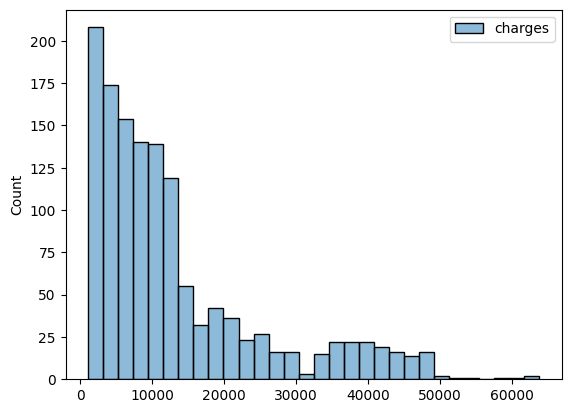

In [220]:
sns.histplot(df[["charges"]])

In [221]:
for col in df10.columns:
    if df10[col].dtype == np.number: 
        continue
    else:
        df10[col] = le.fit_transform(df10[col])

In [222]:
df10.corr()

,age,gender,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
gender,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


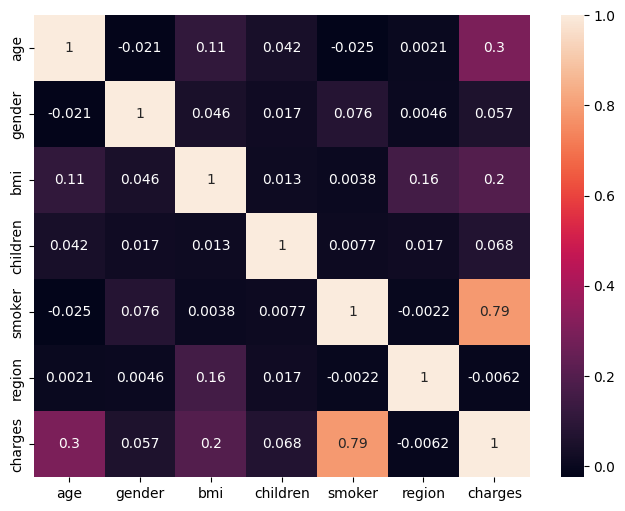

In [223]:
plt.figure(figsize=(8,6))
sns.heatmap(df10.corr(),annot=True)
plt.savefig("why!")